In [58]:
# A lot of code an inspiration is taken from Pytorch Geometric Tutorials

In [59]:
# Node classification on a citation dataset

In [23]:
# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torch

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(out.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [2]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

In [3]:
dataset = Planetoid(root='citation_data/Planetoid', name='Cora', transform=NormalizeFeatures())

print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print()
print(data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Processing...
Done!

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [18]:
data.pos

In [19]:
#####

In [55]:
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import torch.nn as nn

class Model(torch.nn.Module):
    def __init__(self,hidden_channels):
        super(Model,self).__init__()
        self.conv1 = GCNConv(dataset.num_features,hidden_channels)
        self.conv2 = GCNConv(hidden_channels,dataset.num_classes)
    def forward(self,x,edge_index):
        x = self.conv1(x,edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x,edge_index)
        
        return x

In [56]:
model = Model(16)
model(data.x, data.edge_index)
model

torch.Size([2708, 16])
torch.Size([2708, 7])
torch.Size([2708, 7])


Model(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
  (linear): Linear(in_features=7, out_features=10, bias=True)
)

torch.Size([2708, 16])
torch.Size([2708, 7])
torch.Size([2708, 7])


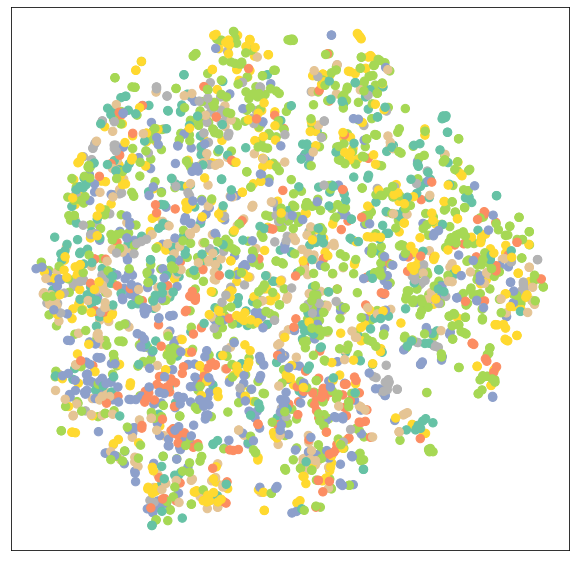

In [57]:
out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [29]:
# TRAIN TIME

In [49]:
model = Model(16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train_epoch():
    optimizer.zero_grad()
    out = model(data.x,data.edge_index)
    loss = criterion(out[data.train_mask],data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss

def test():
    out = model(data.x,data.edge_index)
    pred = out.argmax(dim=1)
    test_correct = pred[data.test_mask] == data.y[data.test_mask]
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
    return test_acc

In [50]:
for epoch in range(1,150):
    loss = train_epoch()
    test_acc = test()
    #print(test_acc)
    #print(loss)
    print('Train Loss: '+str(loss)+'..Test Acc: '+str(test_acc))

Train Loss: tensor(1.9458, grad_fn=<NllLossBackward>)..Test Acc: 0.338
Train Loss: tensor(1.9393, grad_fn=<NllLossBackward>)..Test Acc: 0.367
Train Loss: tensor(1.9320, grad_fn=<NllLossBackward>)..Test Acc: 0.371
Train Loss: tensor(1.9237, grad_fn=<NllLossBackward>)..Test Acc: 0.338
Train Loss: tensor(1.9183, grad_fn=<NllLossBackward>)..Test Acc: 0.407
Train Loss: tensor(1.9094, grad_fn=<NllLossBackward>)..Test Acc: 0.472
Train Loss: tensor(1.8990, grad_fn=<NllLossBackward>)..Test Acc: 0.535
Train Loss: tensor(1.8880, grad_fn=<NllLossBackward>)..Test Acc: 0.515
Train Loss: tensor(1.8775, grad_fn=<NllLossBackward>)..Test Acc: 0.509
Train Loss: tensor(1.8675, grad_fn=<NllLossBackward>)..Test Acc: 0.534
Train Loss: tensor(1.8543, grad_fn=<NllLossBackward>)..Test Acc: 0.539
Train Loss: tensor(1.8496, grad_fn=<NllLossBackward>)..Test Acc: 0.517
Train Loss: tensor(1.8291, grad_fn=<NllLossBackward>)..Test Acc: 0.518
Train Loss: tensor(1.8131, grad_fn=<NllLossBackward>)..Test Acc: 0.534
Train 

Train Loss: tensor(0.4609, grad_fn=<NllLossBackward>)..Test Acc: 0.724
Train Loss: tensor(0.4480, grad_fn=<NllLossBackward>)..Test Acc: 0.727
Train Loss: tensor(0.4637, grad_fn=<NllLossBackward>)..Test Acc: 0.728
Train Loss: tensor(0.4468, grad_fn=<NllLossBackward>)..Test Acc: 0.738
Train Loss: tensor(0.4521, grad_fn=<NllLossBackward>)..Test Acc: 0.745
Train Loss: tensor(0.4485, grad_fn=<NllLossBackward>)..Test Acc: 0.739
Train Loss: tensor(0.4328, grad_fn=<NllLossBackward>)..Test Acc: 0.712
Train Loss: tensor(0.4228, grad_fn=<NllLossBackward>)..Test Acc: 0.724
Train Loss: tensor(0.4383, grad_fn=<NllLossBackward>)..Test Acc: 0.75
Train Loss: tensor(0.4412, grad_fn=<NllLossBackward>)..Test Acc: 0.706
Train Loss: tensor(0.4319, grad_fn=<NllLossBackward>)..Test Acc: 0.716
Train Loss: tensor(0.3763, grad_fn=<NllLossBackward>)..Test Acc: 0.741
Train Loss: tensor(0.4266, grad_fn=<NllLossBackward>)..Test Acc: 0.713
Train Loss: tensor(0.4289, grad_fn=<NllLossBackward>)..Test Acc: 0.742
Train L